#Model Evaluation

In this section, we will explore methods for assessing the performance of models generated by our learning algorithms. Although it may seem strange to discuss model evaluation before delving into model creation, there is a purpose behind this approach. The effectiveness of models lies in the accuracy of their predictions, and our ultimate objective is to develop high-quality models rather than simply creating them. Hence, we begin by establishing the means by which we can evaluate the models produced by the various learning algorithms.

##Problem 3

## 3.1 Cross-Validating Models

Evaluating supervised learning models is not as straightforward as it seems. Simply assessing performance on the training data is not enough. One approach is validation, where data is split into a training set and a test set. However, this has limitations. A better strategy is k-fold cross-validation, dividing data into folds for training and testing multiple times to obtain an average performance measurement.

In this part we want to evaluate how well your model will work in the real world. First, we create a pipeline that preprocesses the data, trains the model, and then evaluates it using cross-validation:

In [1]:
# Load libraries
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


In [ ]:
# Load digits dataset
digits = datasets.load_digits()

digits

In [3]:
# Create features matrix
features = digits.data

features

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
# Create target vector
target = digits.target

target

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
# Create standardizer
standardizer = StandardScaler()

# Create logistic regression object
logit = LogisticRegression()

# Create a pipeline that standardizes, then runs logistic regression
pipeline = make_pipeline(standardizer, logit)

# Create k-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Conduct k-fold cross-validation
cv_results = cross_val_score(pipeline,            # Pipeline
                             features,            # Feature matrix
                             target,              # Target vector
                             cv=kf,               # Cross-validation technique
                             scoring="accuracy",  # Loss function
                             n_jobs=-1)           # Use all CPU scores

# Calculate mean
cv_results.mean()

0.9693916821849783

In our solution, we conducted k-fold cross-validation using 10 folds and outputted the evaluation scores to cv_results:

In [7]:
# View score for all 10 folds
cv_results

array([0.97777778, 0.98888889, 0.96111111, 0.94444444, 0.97777778,
       0.98333333, 0.95555556, 0.98882682, 0.97765363, 0.93854749])

**Discussion**

When using k-fold cross-validation (KFCV), there are three key considerations. First, if the data is assumed to be independent and identically distributed (IID), shuffling the observations can be beneficial.

Second, in classifier evaluation using k-fold cross-validation (KFCV), it is advantageous to ensure that each fold contains a proportional representation of observations from each target class. This approach is called stratified k-fold. For instance, if the target vector represents gender and 80% of the observations are male, each fold would consist of approximately 80% male and 20% female observations. In `scikit-learn`, we can achieve stratified k-fold cross-validation by using the `StratifiedKFold` class instead of KFold.


##3.2 Creating a Baseline Regression Model

In this part we consider a simple baseline regression model to compare against your model. We can use `scikit-learn`’s DummyRegressor to create a simple model to use as a baseline:

In [ ]:
# Load libraries
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)

from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

# # Load data
# boston = load_boston()

# Create features
features, target = california_housing.data, california_housing.target

# Make test and training split
features_train, features_test, target_train, target_test = train_test_split(
        features, target, random_state=0)

# Create a dummy regressor
dummy = DummyRegressor(strategy='mean')

# "Train" dummy regressor
dummy.fit(features_train, target_train)

# Get R-squared score
dummy.score(features_test, target_test)

-0.0004092193772518016

To compare, we train our model and evaluate the performance score:

In [ ]:
# Load library
from sklearn.linear_model import LinearRegression

# Train simple linear regression model
ols = LinearRegression()
ols.fit(features_train, target_train)

# Get R-squared score
ols.score(features_test, target_test)

0.5911695436410485

**Discussion**

`DummyRegressor` provides a straightforward way to create a basic model that serves as a baseline for comparison with our actual model. It is particularly useful for simulating a simplistic or "naive" prediction process that might already exist in a product or system. For instance, if a product initially assumes that all new users will spend $100 in the first month, regardless of their characteristics, we can incorporate this assumption into a baseline model. By doing so, we can explicitly demonstrate the advantages of employing a machine learning approach.

##3.3 Creating a Baseline Classification Model


In this section, we want a simple baseline classifier to compare against your model and we use `scikit-learn`’s DummyClassifier:

In [ ]:
# Load libraries
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

# Load data
iris = load_iris()
# Create target vector and feature matrix
features, target = iris.data, iris.target

# Split into training and test set
features_train, features_test, target_train, target_test = train_test_split(
features, target, random_state=0)

# Create dummy classifier
dummy = DummyClassifier(strategy='uniform', random_state=1)

# "Train" model
dummy.fit(features_train, target_train)

# Get accuracy score
dummy.score(features_test, target_test)


0.42105263157894735

By comparing the baseline classifier to our trained classifier, we can see the improvement:

In [ ]:
# Load library
from sklearn.ensemble import RandomForestClassifier

# Create classifier
classifier = RandomForestClassifier()

# Train model
classifier.fit(features_train, target_train)

# Get accuracy score
classifier.score(features_test, target_test)

0.9736842105263158

**Discussion**

Comparing a classifier's performance to random guessing is a common way to assess its effectiveness. With `scikit-learn`'s `DummyClassifier`, this comparison becomes straightforward. The `strategy` parameter offers several options for generating predictions. Two particularly useful strategies are available.

The first strategy, "`stratified`," produces predictions that are proportional to the class proportions of the target vector in the training set. For instance, if 20% of the observations in the training data are women, `DummyClassifier` will predict women 20% of the time.

The second strategy, "`uniform`," generates predictions uniformly at random across the different classes. For example, if 20% of the observations are women and 80% are men, uniform predictions will be evenly split with 50% women and 50% men.

##3.4 Evaluating Binary Classifier Predictions

Here, your given a trained classification model, and you want to evaluate its quality.

Solution:

Use scikit-learn’s `cross_val_score` to conduct cross-validation while using the scor ing parameter to define one of a number of performance metrics, including accuracy, precision, recall, and F1.
Accuracy is a common performance metric. It is simply the proportion of observations predicted correctly:

  Accuracy = (TP + TN)/(TP + TN + FP + FN)

where:

• TP is the number of true positives. Observations that are part of the positive class (has the disease, purchased the product, etc.) and that we predicted correctly.

• TN is the number of true negatives. Observations that are part of the negative class (does not have the disease, did not purchase the product, etc.) and that we predicted correctly.

• FP is the number of false positives. Also called a Type I error. Observations predicted to be part of the positive class that are actually part of the negative class.

• FN is the number of false negatives. Also called a Type II error. Observations predicted to be part of the negative class that are actually part of the positive class.

We can measure accuracy in three-fold (the default number of folds) cross-validation by setting scoring="accuracy":

In [ ]:
# Load libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generate features matrix and target vector
X, y = make_classification(n_samples = 10000,
                               n_features = 3,
                               n_informative = 3,
                               n_redundant = 0,
                               n_classes = 2,
                               random_state = 1)

# Create logistic regression
logit = LogisticRegression()

# Cross-validate model using accuracy
cross_val_score(logit, X, y, scoring="accuracy")

array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ])

The appeal of accuracy lies in its intuitive and straightforward interpretation: the proportion of correctly predicted observations. However, in real-world scenarios, our data often exhibits imbalanced classes, where one class dominates (e.g., 99.9% of observations belong to class 1 and only 0.1% to class 2). In the presence of imbalanced classes, accuracy faces a paradox where a highly accurate model lacks predictive power.

For instance, let's consider the prediction of a very rare cancer that occurs in only 0.1% of the population. After training our model, we find that the accuracy is 95%. However, 99.9% of people do not have the cancer. If we were to create a naive model that simply predicts that nobody has the cancer, this model would be 4.9% more accurate. However, it clearly fails to make any meaningful predictions.

To address this issue, we are often compelled to utilize alternative metrics such as precision, recall, and the F1 score. These metrics provide a more comprehensive evaluation of model performance, particularly in the presence of imbalanced classes.

**Precision** is the proportion of every observation predicted to be positive that is actually positive. We can think about it as a measurement noise in our predictions that is, when we predict something is positive, how likely we are to be right. Models with high precision are pessimistic in that they only predict an observation is of the positive class when they are very certain about it.

Formally, precision is:

  Precision = TP / (TP + FP)

In [ ]:
 #Cross-validate model using precision
cross_val_score(logit, X, y, scoring="precision")

array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])

**Recall** is the proportion of every positive observation that is truly positive. Recall measures the model’s ability to identify an observation of the positive class. Models with high recall are optimistic in that they have a low bar for predicting that an observation is in the positive class:

  Recall = TP / (TP + FN)

In [ ]:
# Cross-validate model using recall
cross_val_score(logit, X, y, scoring="recall")

array([0.951, 0.952, 0.953, 0.949, 0.951])

If you're unfamiliar with precision and recall, it may take some time to grasp their concepts fully. This is a limitation of accuracy, as precision and recall are not as intuitive. Typically, we aim for a balance between precision and recall, and the F1 score serves this purpose. The F1 score is calculated as the harmonic mean, which is a type of average used for ratios.

F1 = 2 × (Precision × Recall) / (Precision + Recall)

It is a measure of correctness achieved in positive prediction—that is, of observations labeled as positive, how many are actually positive:

In [ ]:
# Cross-validate model using f1
cross_val_score(logit, X, y, scoring="f1")

array([0.95529884, 0.9500998 , 0.95827049, 0.95520886, 0.95577889])

**Discusion**

In the context of evaluating models, accuracy is a useful metric due to its straightforward interpretation. However, more advanced metrics often require a trade-off between precision and recall, striking a balance between the optimism and pessimism of the model. The F1 score provides such a balance by giving equal weight to both precision and recall.

##3.5 Evaluating Binary Classifier Thresholds

In this section we use another evaluation metrics to evaluate a binary classifier and various probability thresholds: **The Receiving Operating Characteristic (ROC)**

The Receiver Operating Characteristic (ROC) curve is a widely used method for assessing the performance of a binary classifier. It compares the true positive and false positive rates at various probability thresholds, which determine the classification of observations. Plotting the ROC curve allows us to visualize the model's performance.

A perfect classifier would be represented by a solid light gray line, going directly to the top, while a random classifier would appear as a diagonal line. The closer the model's curve is to the solid line, the better its performance. In scikit-learn, the roc_curve function can be used to calculate the true and false positive rates at each threshold and plot them.



In [ ]:
# Load libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

# Create feature matrix and target vector
features, target = make_classification(n_samples=10000,
                                           n_features=10,
                                           n_classes=2,
                                           n_informative=3,
                                           random_state=3)
# Split into training and test sets
features_train, features_test, target_train, target_test = train_test_split(
features, target, test_size=0.1, random_state=1)

In [ ]:
# Create classifier
logit = LogisticRegression()

# Train model
logit.fit(features_train, target_train)

# Get predicted probabilities
target_probabilities = logit.predict_proba(features_test)[:,1]

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(target_test,
                                                               target_probabilities)


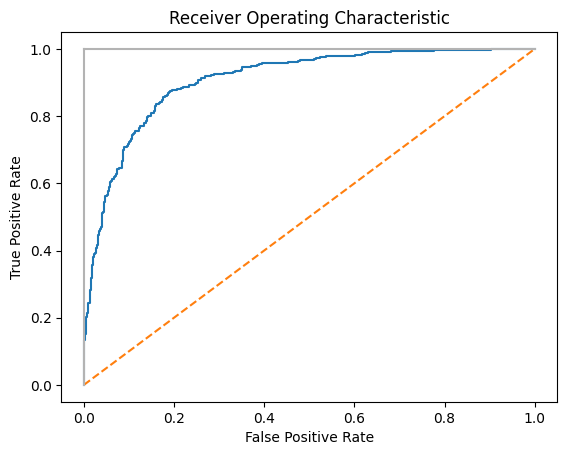

In [ ]:
# Plot ROC curve
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

**Discussion**

So far, our analysis has focused on evaluating models solely based on their predicted values. However, in many machine learning algorithms, these predictions are derived from probability estimates. Each observation is assigned a probability of belonging to each class. In our approach, we can utilize the `predict_proba` function to examine the predicted probabilities for the first observation.

In [ ]:
# Get predicted probabilities
logit.predict_proba(features_test)[0:1]

array([[0.86891533, 0.13108467]])

We can see the classes using `classes_`:

In [ ]:
logit.classes_

array([0, 1])

In the given example, the first observation is estimated to have approximately an 87% probability of belonging to the negative class (0) and a 13% probability of belonging to the positive class (1). By default, `scikit-learn` considers an observation as part of the positive class if the probability is greater than 0.5, which is the threshold. However, there are instances where we may want to intentionally adjust the threshold to favor one class over the other for specific reasons, rather than sticking to a neutral threshold.

When the cost of a false positive is high, it is preferable to use a model with a high probability threshold. Although this approach may result in missing some positive predictions, it ensures a higher level of confidence in the accuracy of positive predictions. The trade-off between false positives and true positives is captured by two metrics: the true positive rate (TPR), which calculates the proportion of correctly predicted positive observations out of all actual positive observations, and the false positive rate (FPR).



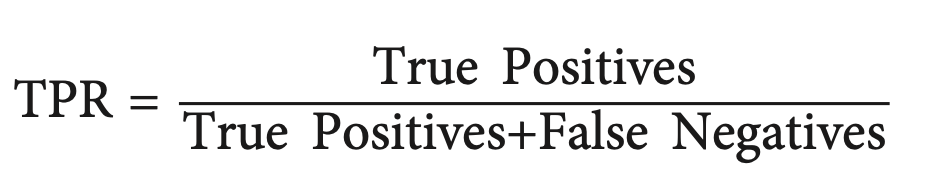

The false positive rate is the number of incorrectly predicted positives divided by all true negative observations:

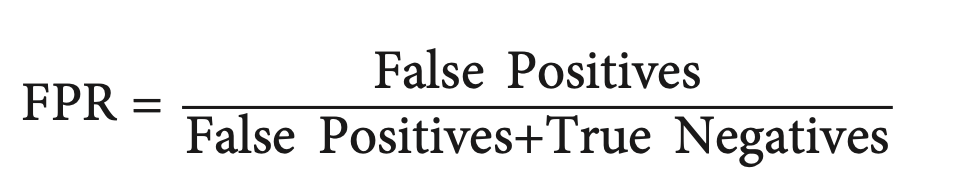

In addition to being able to visualize the trade-off between TPR and FPR, the ROC curve can also be used as a general metric for a model. The better a model is, the higher the curve and thus the greater the area under the curve. For this reason, it is common to calculate [the area under the ROC curve](http://bit.ly/2FxTrl6) (**AUCROC**) to judge the overall equality of a model at all possible thresholds. The closer the **AUCROC** is to 1, the better the model. In `scikit-learn` we can calculate the **AUCROC** using `roc_auc_score`:

In [ ]:
# Calculate area under curve
roc_auc_score(target_test, target_probabilities)

0.9073389355742297

##3.6 Evaluating Multiclass Classifier Predictions

Inn this part we have a model that predicts three or more classes and want to evaluate its performance.

We use cross-validation with an evaluation metric capable of handling more than two classes:

In [ ]:
# Load libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generate features matrix and target vector
features, target = make_classification(n_samples = 10000,
                               n_features = 3,
                               n_informative = 3,
                               n_redundant = 0,
                               n_classes = 3,
                               random_state = 1)

# Create logistic regression
logit = LogisticRegression()

# Cross-validate model using accuracy
cross_val_score(logit, features, target, scoring='accuracy')

array([0.841 , 0.829 , 0.8265, 0.8155, 0.82  ])

**Discussion**

Scikit-learn provides several metrics for evaluating binary classifiers, but these metrics can also be adapted for multiclass classification tasks. Precision, recall, and F1 scores, which we have previously discussed, can be applied to multiclass settings by treating the data as a collection of binary classes. This approach allows us to evaluate each class individually as if it were the only class in the dataset, and then aggregate the evaluation scores by taking their average.

In [ ]:
# Cross-validate model using macro averaged F1 score
cross_val_score(logit, features, target, scoring='f1_macro')

array([0.84061272, 0.82895312, 0.82625661, 0.81515121, 0.81992692])

In this code, _macro refers to the method used to average the evaluation scores from the classes:

*macro*

  Calculate mean of metric scores for each class, weighting each class equally.

*weighted*

  Calculate mean of metric scores for each class, weighting each class proportional to its size in the data.

*micro*

  Calculate mean of metric scores for each observation-class combination.

##3.7 Visualizing a Classifier’s Performance

Suppose we are given predicted classes and true classes of the test data, and want to visually compare the model’s quality. We can use a confusion matrix, which compares predicted classes and true classes:

In [ ]:
# Load libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd


In [ ]:
# Load data
iris = datasets.load_iris()

# Create feature matrix
features = iris.data

# Create target vector
target = iris.target

# Create list of target class names
class_names = iris.target_names

# Create training and test set
features_train, features_test, target_train, target_test = train_test_split(
        features, target, random_state=1)

In [ ]:
# Create logistic regression
classifier = LogisticRegression()

# Train model and make predictions
target_predicted = classifier.fit(features_train,
        target_train).predict(features_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Create confusion matrix
matrix = confusion_matrix(target_test, target_predicted)

# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

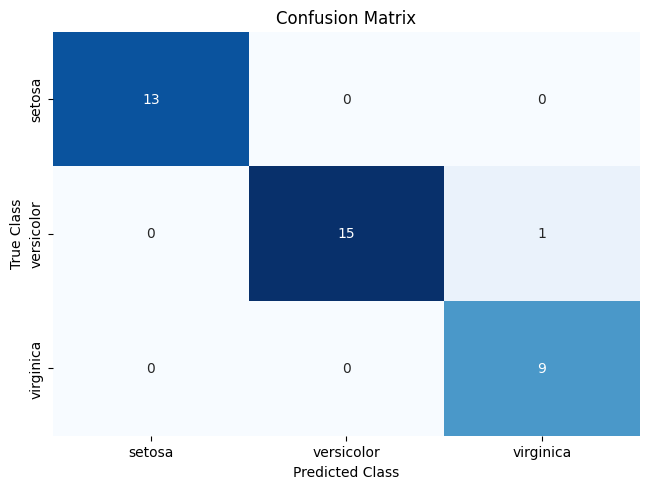

In [ ]:
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

**Discussion**

Confusion matrices provide a straightforward and effective way to visualize the performance of a classifier. They are highly interpretable and offer valuable insights. In a confusion matrix, each column represents the predicted classes, while each row represents the true classes. Each cell in the matrix represents a specific combination of predicted and true classes. Let's consider an example to better understand this concept.

In our solution, the top-left cell in the confusion matrix corresponds to the number of observations that were predicted as Iris setosa (column) and actually belonged to the Iris setosa class (row). This indicates that the model accurately predicted all Iris setosa flowers. However, the model doesn't perform as well in predicting Iris virginica. The bottom-right cell indicates that the model correctly predicted nine observations as Iris virginica, but misclassified six flowers as Iris virginica instead of Iris versicolor (as shown by the cell one row up).

There are a few key points to note about confusion matrices. Firstly, a perfect model would have non-zero values only along the diagonal, while a poor model would have observation counts distributed evenly across cells. Secondly, confusion matrices allow us to identify not only where the model made mistakes but also how it made those mistakes. We can observe patterns of misclassification. For instance, our model distinguished between Iris virginica and Iris setosa easily but struggled more with classifying Iris virginica and Iris versicolor. Lastly, confusion matrices can be used with any number of classes, although for a large number of classes, the visualization might become challenging to interpret.

##3.8 Creating a Text Report of Evaluation Metrics

If you want a quick description of a classifier’s performance, use scikit-learn’s `classification_report`.

`classification_report` provides a quick means for us to see some common evaluation metrics, including precision, recall, and F1-score. Support refers to the number of observations in each class.

In [ ]:
# Load libraries
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load data
iris = datasets.load_iris()

# Create feature matrix
features = iris.data

# Create target vector
target = iris.target

# Create list of target class names
class_names = iris.target_names

# Create training and test set
features_train, features_test, target_train, target_test = train_test_split(
        features, target, random_state=1)


In [ ]:
# Create logistic regression
classifier = LogisticRegression()

# Train model and make predictions
model = classifier.fit(features_train, target_train)
target_predicted = model.predict(features_test)

# Create a classification report
print(classification_report(target_test, target_predicted,
                                target_names=class_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##3.9 Visualizing the Effect of Hyperparameter Values

If you want to understand how the performance of a model changes as the value of some hyperparameter changes, plot the validation curve:

In [ ]:
# Load libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

# Load data
digits = load_digits()

# Create feature matrix and target vector
features, target = digits.data, digits.target

# Create range of values for parameter
param_range = np.arange(1, 250, 2)

In [ ]:
# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(
    # Classifier
    RandomForestClassifier(),
    # Feature matrix
    features,
    # Target vector
    target,
    # Hyperparameter to examine
    param_name="n_estimators",
    # Range of hyperparameter's values
    param_range=param_range,
    # Number of folds
    cv=3,
    # Performance metric
    scoring="accuracy",
    # Use all computer cores
    n_jobs=-1)


In [ ]:
# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


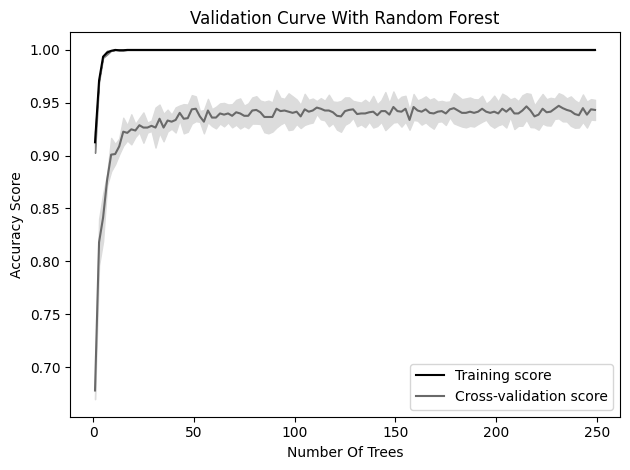

In [ ]:
# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std,
                 train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std,
                 test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

**Discussion**

Many training algorithms, involve hyperparameters that need to be set before the training process. For instance, in a random forest classifier, which constructs a "forest" of decision trees, one of the hyperparameters is the number of trees in the forest. Typically, hyperparameter values are chosen during model selection. However, it can be beneficial to visualize how the model's performance changes as the hyperparameter value varies.

In our solution, we illustrate this by plotting the accuracy of a random forest classifier on the training set and during cross-validation as the number of trees increases. Initially, with a small number of trees, both the training and cross-validation scores are low, indicating that the model is underfitting. As the number of trees increases to 250, the accuracy levels off, suggesting that the additional computational cost of training a large forest may not provide much improvement.

To calculate the validation curve in scikit-learn, we can use the function validation_curve, which requires three important parameters:

- param_name: This is the name of the hyperparameter that we want to vary.

- param_range: It specifies the range of values for the hyperparameter.

- scoring: This parameter determines the evaluation metric used to assess the model's performance.
